# جمع ومعالجة وتنظيف البيانات

هذا الدفتر يحتوي على خطوات جمع ومعالجة وتنظيف البيانات

## استيراد المكتبات المطلوبة

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# تعيين نمط seaborn
sns.set_style('whitegrid')
# تعيين حجم الرسومات
plt.rcParams['figure.figsize'] = (12, 8)

## تحميل البيانات

In [2]:
# تحميل البيانات
df = pd.read_csv('../data/raw/sales_data.csv')

# عرض الأبعاد
print('أبعاد البيانات:', df.shape)

# عرض العينة الأولى
df.head()

أبعاد البيانات: (3000, 8)


,Order_Date,Category,Region,Segment,Sales,Quantity,Discount,Profit
0,2020-01-01,Technology,South,Consumer,366.800399,6,0.284533,9.524490
1,2020-01-02,Furniture,South,Home Office,NaN,6,0.191294,37.407146
2,2020-01-03,Technology,West,Home Office,212.152047,1,0.162915,125.708433
3,2020-01-04,Technology,East,Consumer,687.228360,5,0.118807,137.810135
4,2020-01-05,Furniture,East,Home Office,147.447790,6,0.267729,-30.090084


## فحص البيانات

In [3]:
# معلومات عامة عن البيانات
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_Date  3000 non-null   object 
 1   Category    3000 non-null   object 
 2   Region      3000 non-null   object 
 3   Segment     3000 non-null   object 
 4   Sales       2698 non-null   float64
 5   Quantity    3000 non-null   int64  
 6   Discount    3000 non-null   float64
 7   Profit      3000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 187.6+ KB


In [4]:
# إحصائيات وصفية للبيانات العددية
df.describe()

,Sales,Quantity,Discount,Profit
count,2698.000000,3000.000000,3000.000000,3000.000000
mean,552.967822,5.029000,0.250624,49.975945
std,261.068627,2.551796,0.143714,85.439617
min,100.564765,1.000000,0.000059,-99.947345
25%,334.420971,3.000000,0.127162,-23.179379
50%,556.867561,5.000000,0.253505,49.480459
75%,774.627375,7.000000,0.373137,121.334853
max,999.864320,9.000000,0.499908,199.967800


In [5]:
# فحص القيم المفقودة
missing_values = df.isnull().sum()
print('القيم المفقودة:')
print(missing_values[missing_values > 0])

القيم المفقودة:
Sales    302
dtype: int64


## معالجة القيم المفقودة

In [7]:
# معالجة القيم المفقودة في الأعمدة العددية
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# معالجة القيم المفقودة في الأعمدة الفئوية
categorical_cols = ['Category', 'Region', 'Segment']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

## معالجة التواريخ

In [8]:
# تحويل عمود التاريخ
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# استخراج ميزات من التاريخ
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Quarter'] = df['Order_Date'].dt.quarter

# عرض البيانات بعد إضافة الميزات الجديدة
df.head()

,Order_Date,Category,Region,Segment,Sales,Quantity,Discount,Profit,Year,Month,Quarter
0,2020-01-01,Technology,South,Consumer,366.800399,6,0.284533,9.524490,2020,1,1
1,2020-01-02,Furniture,South,Home Office,556.867561,6,0.191294,37.407146,2020,1,1
2,2020-01-03,Technology,West,Home Office,212.152047,1,0.162915,125.708433,2020,1,1
3,2020-01-04,Technology,East,Consumer,687.228360,5,0.118807,137.810135,2020,1,1
4,2020-01-05,Furniture,East,Home Office,147.447790,6,0.267729,-30.090084,2020,1,1


## تحليل استكشافي للبيانات

d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


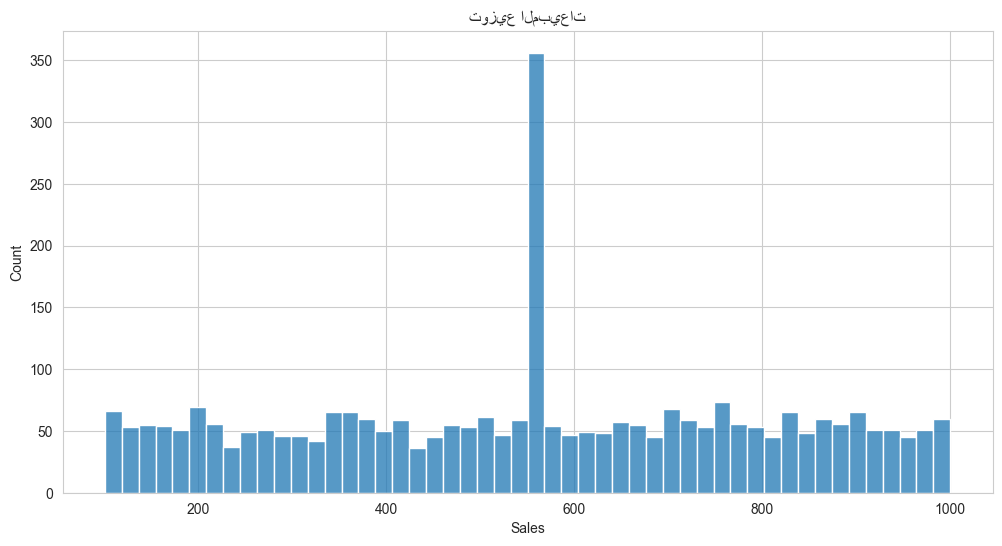

In [9]:
# توزيع المبيعات
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sales', bins=50)
plt.title('توزيع المبيعات')
plt.show()

d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


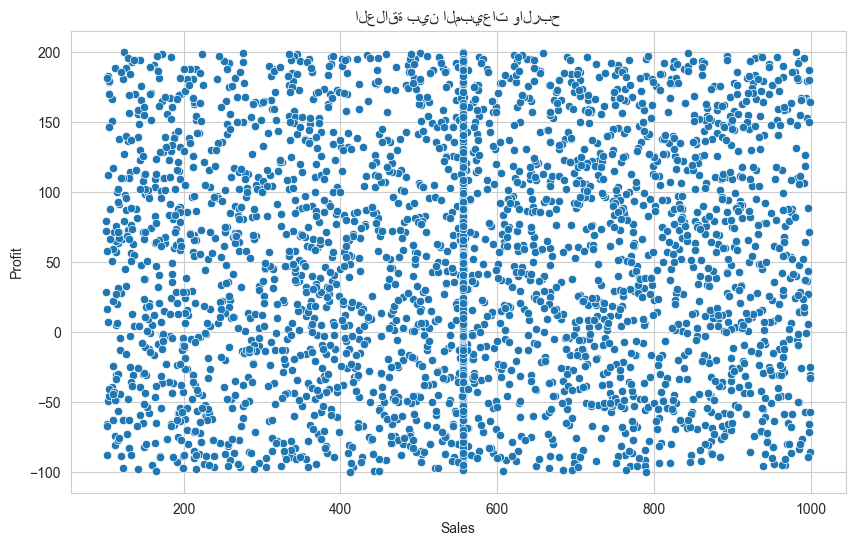

In [10]:
# العلاقة بين المبيعات والربح
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title('العلاقة بين المبيعات والربح')
plt.show()

d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


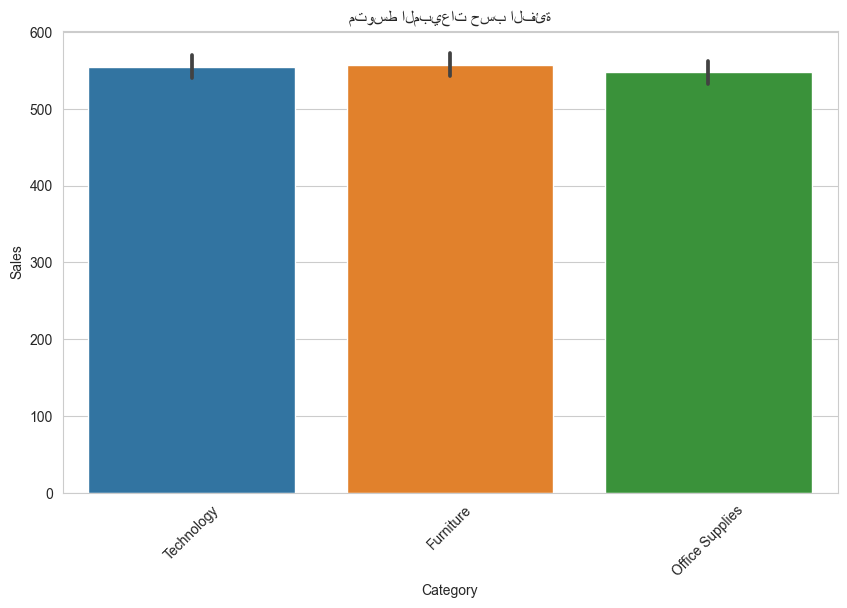

In [11]:
# متوسط المبيعات حسب الفئة
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Sales')
plt.title('متوسط المبيعات حسب الفئة')
plt.xticks(rotation=45)
plt.show()

## تصنيف المبيعات إلى فئات

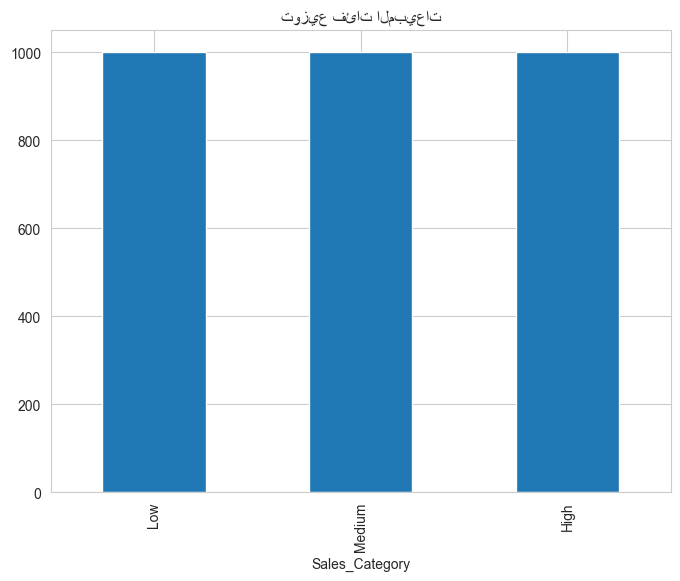

In [12]:
# تصنيف المبيعات إلى فئات (منخفضة، متوسطة، مرتفعة)
df['Sales_Category'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Medium', 'High'])

# عرض توزيع الفئات
plt.figure(figsize=(8, 6))
df['Sales_Category'].value_counts().plot(kind='bar')
plt.title('توزيع فئات المبيعات')
plt.show()

## حفظ البيانات المعالجة

In [13]:
# حفظ البيانات المعالجة
processed_data_path = f'../data/processed/sales_data_processed_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
df.to_csv(processed_data_path, index=False)
print(f'تم حفظ البيانات المعالجة في: {processed_data_path}')

تم حفظ البيانات المعالجة في: ../data/processed/sales_data_processed_20250122_052318.csv
